<a href="https://colab.research.google.com/github/Salvini126/informatica/blob/main/esercizio_riepilogativo_in_preparazione_alla_verifica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas
!pip install contextily

In [3]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm.zip")
biciSosta = geopandas.read_file("/content/drive/MyDrive/bike_areesosta.zip")
stradario = geopandas.read_file("/content/drive/MyDrive/stradario.csv")

In [6]:
quartieri

ID_NIL                                             NIL  Valido_dal  \
0       48  RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO  05/02/2020   
1       64                                          TRENNO  05/02/2020   
2       67                                        PORTELLO  05/02/2020   
3       81                                       BOVISASCA  05/02/2020   
4       84                                      PARCO NORD  05/02/2020   
..     ...                                             ...         ...   
83      68                                          PAGANO  05/02/2020   
84       2                                           BRERA  05/02/2020   
85      33                         ROGOREDO - SANTA GIULIA  05/02/2020   
86      17                                         ADRIANO  05/02/2020   
87      53                                     LORENTEGGIO  05/02/2020   

   Valido_al                        Fonte    Shape_Leng    Shape_Area  \
0    Vigente  Milano 2030 - PGT Approvato   8723.368714  2.406306e+06   
1    Vigente  Milano 2030 - PGT Approvato   3309.998800  4.896921e+05   
2    Vigente  Milano 2030 - PGT Approvato   3800.750663  9.096022e+05   
3    Vigente  Milano 2030 - PGT Approvato   7105.469715  1.578028e+06   
4    Vigente  Milano 2030 - PGT Approvato  11741.717005  1.532331e+06   
..       ...                          ...           ...           ...   
83   Vigente  Milano 2030 - PGT Approvato   5221.836696  1.289686e+06   
84   Vigente  Milano 2030 - PGT Approvato   5461.667196  1.637333e+06   
85   Vigente  Milano 2030 - PGT Approvato   6012.496435  1.200116e+06   
86   Vigente  Milano 2030 - PGT Approvato   9276.875747  2.433358e+06   
87   Vigente  Milano 2030 - PGT Approvato   8442.031660  2.644338e+06   

    OBJECTID                                           geometry  
0         89  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...  
1         90  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...  
2         91  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...  
3         92  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...  
4         93  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...  
..       ...                                                ...  
83       172  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...  
84       173  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...  
85       174  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...  
86       175  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...  
87       176  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...  

[88 rows x 9 columns]

In [7]:
biciSosta

id_amat id_via num_civico municipio      stato  categoriev  numero_man  \
0           2   5339          0         5  Esistente  Velocipedi           3   
1           4   1545         21         9  Esistente  Velocipedi           2   
2           8   6330         42         7  Esistente  Velocipedi           1   
3           9   7165          4         8  Esistente  Velocipedi           1   
4          10   6660          5         6  Esistente  Velocipedi           1   
...       ...    ...        ...       ...        ...         ...         ...   
1517     3232   1242         72         9  Esistente  Velocipedi           3   
1518     3233   1242         72         9  Esistente  Velocipedi           5   
1519     3234   1242         72         9  Esistente  Velocipedi           6   
1520     3235   1242         72         9  Esistente  Velocipedi          29   
1521     3243   4290         36         5  Esistente  Velocipedi           6   

      stalli_per  stalli_tot                                    tipomanufa  \
0              5          15                                        Verona   
1              5          10                               0_Non precisato   
2              5           5                                  Redondo Inox   
3              5           5                                  Redondo Inox   
4              4           4                               0_Non precisato   
...          ...         ...                                           ...   
1517           4          12                                   Triangolare   
1518           2          10  Archetto Milano _ Acciaio inox _ Passo cm 80   
1519           2          12  Archetto Milano _ Acciaio inox _ Passo cm 80   
1520           2          58  Archetto Milano _ Acciaio inox _ Passo cm 80   
1521           5          30                             Verona _ Ambrogio   

                                      ubicazione                  geometry  
0                                    Marciapiede  POINT (9.17821 45.42991)  
1                   Alla quota della carreggiata  POINT (9.16829 45.51697)  
2     Cortile o altro spazio collegato al civico  POINT (9.08480 45.47628)  
3     Cortile o altro spazio collegato al civico  POINT (9.15673 45.48228)  
4                                    Marciapiede  POINT (9.12054 45.45506)  
...                                          ...                       ...  
1517  Cortile o altro spazio collegato al civico  POINT (9.16586 45.50530)  
1518  Cortile o altro spazio collegato al civico  POINT (9.16628 45.50584)  
1519  Cortile o altro spazio collegato al civico  POINT (9.16634 45.50568)  
1520  Cortile o altro spazio collegato al civico  POINT (9.16633 45.50532)  
1521               Area verde ? Giardino ? Parco  POINT (9.21895 45.43356)  

[1522 rows x 12 columns]

In [8]:
stradario

CODICE_VIA AREA DESCRIZIONE_VIA CIVICO BARRATO  CAP SEZIONE MUNICIPIO  \
0           4377  VIA  8 OTTOBRE 2001     12          138     916         4   
1           3123  VIA     A.DEL SARTO      1          129     665         3   
2           3123  VIA     A.DEL SARTO      3          129     665         3   
3           3123  VIA     A.DEL SARTO      4          129     665         3   
4           3123  VIA     A.DEL SARTO      5          129     665         3   
...          ...  ...             ...    ...     ...  ...     ...       ...   
51318       6318  VIA          ZURIGO     24          147     394         7   
51319       6318  VIA          ZURIGO     24       4  147     394         7   
51320       6318  VIA          ZURIGO     25          147    1412         6   
51321       6318  VIA          ZURIGO     28          147     539         7   
51322       6318  VIA          ZURIGO     65          147    1412         6   

      geometry  
0         None  
1         None  
2         None  
3         None  
4         None  
...        ...  
51318     None  
51319     None  
51320     None  
51321     None  
51322     None  

[51323 rows x 9 columns]

- una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [9]:
biciSosta['id_via'] = pd.to_numeric(biciSosta['id_via'])
stradario['CODICE_VIA'] = pd.to_numeric(stradario['CODICE_VIA'])

In [10]:
stradario_sd = stradario.drop_duplicates(subset = ["CODICE_VIA"])

In [11]:
stradario_sd = stradario_sd.drop(columns=["geometry"])

In [12]:
stradario_sd

CODICE_VIA AREA      DESCRIZIONE_VIA CIVICO BARRATO  CAP SEZIONE  \
0            4377  VIA       8 OTTOBRE 2001     12          138     916   
1            3123  VIA          A.DEL SARTO      1          129     665   
27           3135  VIA    ABAMONTI GIUSEPPE      1          129     113   
30           2558  VIA                ABANO      3          131    1565   
41           1295  VIA      ABBA GIUSEPPE C      4          158    1184   
...           ...  ...                  ...    ...     ...  ...     ...   
51220        5390  VIA              ZUCCARO      2          146    1028   
51226        1254  VIA      ZUCCOLI LUCIANO      6          125    1608   
51235        5302  VIA  ZUMBINI BONAVENTURA      6          143    1008   
51251        1216  VIA           ZURETTI G.      1          125    1605   
51306        6318  VIA               ZURIGO      2          147    1082   

      MUNICIPIO  
0             4  
1             3  
27            3  
30            3  
41            9  
...         ...  
51220         6  
51226         2  
51235         6  
51251         2  
51306         7  

[3954 rows x 8 columns]

In [13]:
areeLista = pd.merge(biciSosta, stradario_sd, how = "left", left_on = ['id_via'], right_on = ['CODICE_VIA'])
areeLista

id_amat  id_via num_civico municipio      stato  categoriev  numero_man  \
0           2  5339.0          0         5  Esistente  Velocipedi           3   
1           4  1545.0         21         9  Esistente  Velocipedi           2   
2           8  6330.0         42         7  Esistente  Velocipedi           1   
3           9  7165.0          4         8  Esistente  Velocipedi           1   
4          10  6660.0          5         6  Esistente  Velocipedi           1   
...       ...     ...        ...       ...        ...         ...         ...   
1517     3232  1242.0         72         9  Esistente  Velocipedi           3   
1518     3233  1242.0         72         9  Esistente  Velocipedi           5   
1519     3234  1242.0         72         9  Esistente  Velocipedi           6   
1520     3235  1242.0         72         9  Esistente  Velocipedi          29   
1521     3243  4290.0         36         5  Esistente  Velocipedi           6   

      stalli_per  stalli_tot                                    tipomanufa  \
0              5          15                                        Verona   
1              5          10                               0_Non precisato   
2              5           5                                  Redondo Inox   
3              5           5                                  Redondo Inox   
4              4           4                               0_Non precisato   
...          ...         ...                                           ...   
1517           4          12                                   Triangolare   
1518           2          10  Archetto Milano _ Acciaio inox _ Passo cm 80   
1519           2          12  Archetto Milano _ Acciaio inox _ Passo cm 80   
1520           2          58  Archetto Milano _ Acciaio inox _ Passo cm 80   
1521           5          30                             Verona _ Ambrogio   

                                      ubicazione                  geometry  \
0                                    Marciapiede  POINT (9.17821 45.42991)   
1                   Alla quota della carreggiata  POINT (9.16829 45.51697)   
2     Cortile o altro spazio collegato al civico  POINT (9.08480 45.47628)   
3     Cortile o altro spazio collegato al civico  POINT (9.15673 45.48228)   
4                                    Marciapiede  POINT (9.12054 45.45506)   
...                                          ...                       ...   
1517  Cortile o altro spazio collegato al civico  POINT (9.16586 45.50530)   
1518  Cortile o altro spazio collegato al civico  POINT (9.16628 45.50584)   
1519  Cortile o altro spazio collegato al civico  POINT (9.16634 45.50568)   
1520  Cortile o altro spazio collegato al civico  POINT (9.16633 45.50532)   
1521               Area verde ? Giardino ? Parco  POINT (9.21895 45.43356)   

      CODICE_VIA AREA  DESCRIZIONE_VIA CIVICO BARRATO  CAP SEZIONE MUNICIPIO  
0         5339.0  PZA    ABBIATEGRASSO      1          142    2066         5  
1         1545.0  VLE           AFFORI      1          161    1216         9  
2         6330.0  VIA  AIRAGHI GAETANO      3          153    2117         7  
3         7165.0  VIA          ALCUINO      1          149     444         8  
4         6660.0  VIA         ALLODOLA      5          147    1032         6  
...          ...  ...              ...    ...     ...  ...     ...       ...  
1517      1242.0  VIA      CANDIANI G.      5          158    1954         9  
1518      1242.0  VIA      CANDIANI G.      5          158    1954         9  
1519      1242.0  VIA      CANDIANI G.      5          158    1954         9  
1520      1242.0  VIA      CANDIANI G.      5          158    1954         9  
1521      4290.0  VIA      SAN DIONIGI      1          139    1855         4  

[1522 rows x 20 columns]

In [14]:
areeLista[["AREA","DESCRIZIONE_VIA","CIVICO","stalli_tot"]]

AREA  DESCRIZIONE_VIA CIVICO  stalli_tot
0     PZA    ABBIATEGRASSO      1          15
1     VLE           AFFORI      1          10
2     VIA  AIRAGHI GAETANO      3           5
3     VIA          ALCUINO      1           5
4     VIA         ALLODOLA      5           4
...   ...              ...    ...         ...
1517  VIA      CANDIANI G.      5          12
1518  VIA      CANDIANI G.      5          10
1519  VIA      CANDIANI G.      5          12
1520  VIA      CANDIANI G.      5          58
1521  VIA      SAN DIONIGI      1          30

[1522 rows x 4 columns]

- una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [15]:
areaListQua = geopandas.sjoin(areeLista, quartieri, op = "within", how = "left")
areaListQua.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


id_amat  id_via num_civico municipio      stato  categoriev  numero_man  \
0        2  5339.0          0         5  Esistente  Velocipedi           3   
1        4  1545.0         21         9  Esistente  Velocipedi           2   
2        8  6330.0         42         7  Esistente  Velocipedi           1   
3        9  7165.0          4         8  Esistente  Velocipedi           1   
4       10  6660.0          5         6  Esistente  Velocipedi           1   

   stalli_per  stalli_tot       tipomanufa  ... MUNICIPIO index_right  ID_NIL  \
0           5          15           Verona  ...         5        59.0    42.0   
1           5          10  0_Non precisato  ...         9        69.0    80.0   
2           5           5     Redondo Inox  ...         7        11.0    62.0   
3           5           5     Redondo Inox  ...         8         2.0    67.0   
4           4           4  0_Non precisato  ...         6        87.0    53.0   

                                                 NIL  Valido_dal Valido_al  \
0  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...  05/02/2020   Vigente   
1                                             AFFORI  05/02/2020   Vigente   
2                                      QUINTO ROMANO  05/02/2020   Vigente   
3                                           PORTELLO  05/02/2020   Vigente   
4                                        LORENTEGGIO  05/02/2020   Vigente   

                         Fonte   Shape_Leng    Shape_Area OBJECTID  
0  Milano 2030 - PGT Approvato  8831.940397  3.232115e+06    148.0  
1  Milano 2030 - PGT Approvato  6470.396969  2.070816e+06    158.0  
2  Milano 2030 - PGT Approvato  6962.785127  1.645797e+06    100.0  
3  Milano 2030 - PGT Approvato  3800.750663  9.096022e+05     91.0  
4  Milano 2030 - PGT Approvato  8442.031660  2.644338e+06    176.0  

[5 rows x 29 columns]

In [16]:
areaListQua[["stalli_tot","DESCRIZIONE_VIA","CIVICO", "NIL"]]

stalli_tot  DESCRIZIONE_VIA CIVICO  \
0             15    ABBIATEGRASSO      1   
1             10           AFFORI      1   
2              5  AIRAGHI GAETANO      3   
3              5          ALCUINO      1   
4              4         ALLODOLA      5   
...          ...              ...    ...   
1517          12      CANDIANI G.      5   
1518          10      CANDIANI G.      5   
1519          12      CANDIANI G.      5   
1520          58      CANDIANI G.      5   
1521          30      SAN DIONIGI      1   

                                                    NIL  
0     STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...  
1                                                AFFORI  
2                                         QUINTO ROMANO  
3                                              PORTELLO  
4                                           LORENTEGGIO  
...                                                 ...  
1517                                             BOVISA  
1518                                             BOVISA  
1519                                             BOVISA  
1520                                             BOVISA  
1521                                       SCALO ROMANA  

[1522 rows x 4 columns]

- i nomi dei quartieri in cui non ci sono aree di sosta;

In [17]:
quaNoSos = quartieri[~quartieri.NIL.isin(areaListQua["NIL"])]
quaNoSos[["NIL"]]

NIL
1                   TRENNO
5                   FIGINO
22              STEPHENSON
23               CANTALUPA
24              QUINTOSOLE
28   PARCO BOSCO IN CITTA'
36                 ASSIANO
46    RONCHETTO DELLE RANE
48  MONLUE' - PONTE LAMBRO
54             CHIARAVALLE
80         CASCINA MERLATA
82       PARCO DEI NAVIGLI

- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

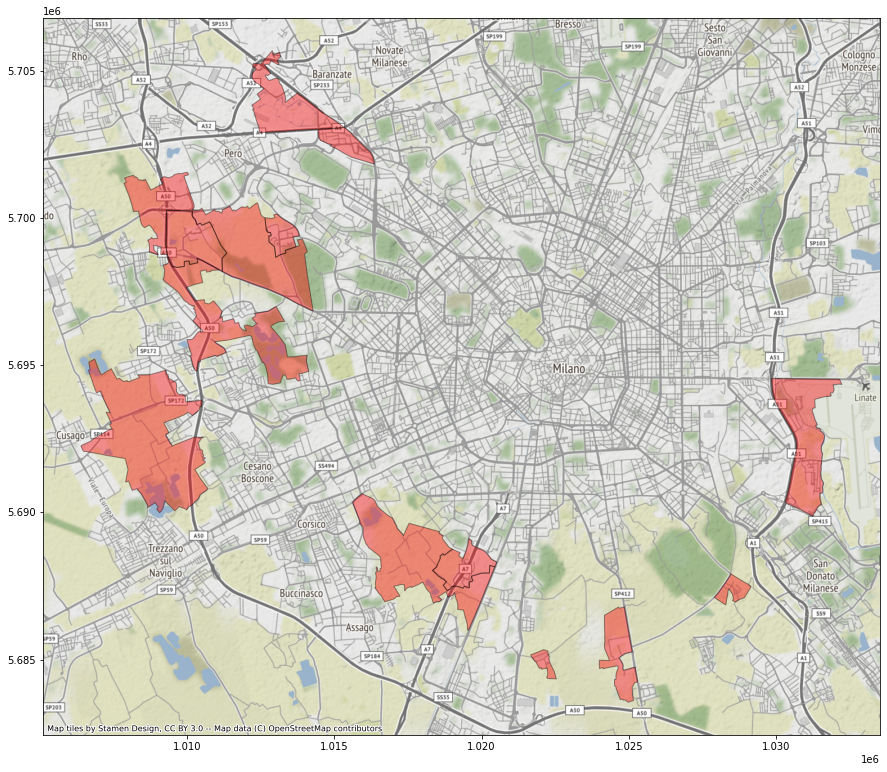

In [18]:
ax = quaNoSos.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k")
contextily.add_basemap(ax)

- il nome del quartiere con più aree di sosta;

In [19]:
groupbyGeo = areaListQua.groupby("NIL").count()[["id_via"]].reset_index()
quaPiuAree = groupbyGeo[groupbyGeo.id_via == groupbyGeo.id_via.max()]
quaPiuAree

NIL  id_via
17  DUOMO     136

In [20]:
quaMap = pd.merge(quartieri, quaPiuAree, how = "inner", on = "NIL")
quaMap

ID_NIL    NIL  Valido_dal Valido_al                        Fonte  \
0       1  DUOMO  05/02/2020   Vigente  Milano 2030 - PGT Approvato   

    Shape_Leng    Shape_Area  OBJECTID  \
0  7571.275544  2.341616e+06       101   

                                            geometry  id_via  
0  POLYGON ((9.19482 45.47201, 9.19495 45.47213, ...     136

- una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

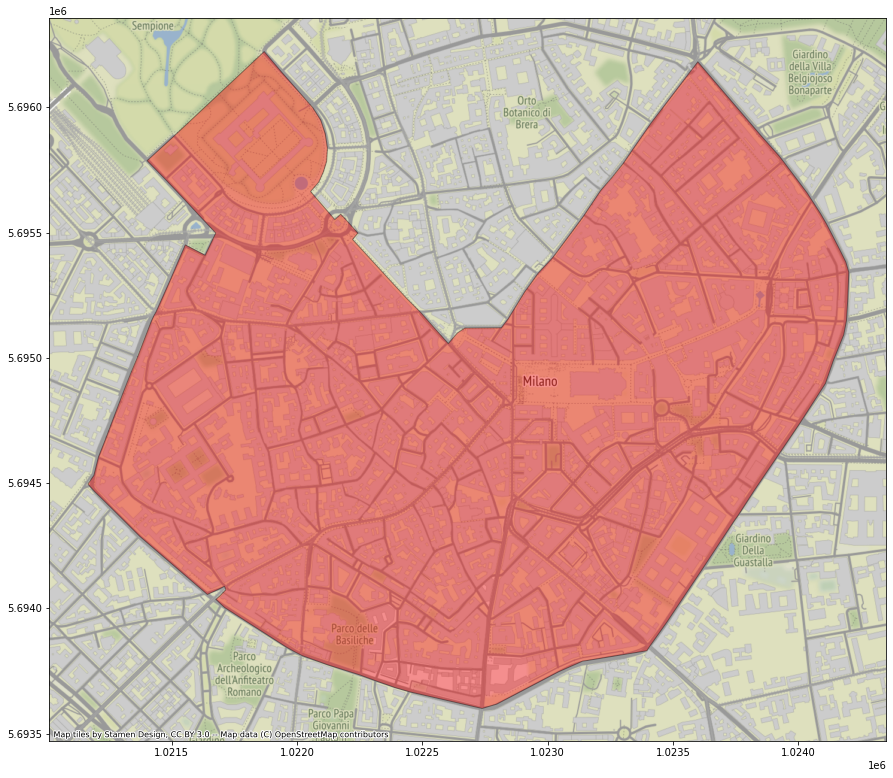

In [21]:
ax = quaMap.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k")
contextily.add_basemap(ax)

- i nomi dei quartieri con un numero di aree di sosta minori della media;

In [22]:
mediaAree = groupbyGeo.id_via.mean()
mediaAree

19.894736842105264

In [23]:
quaMin = groupbyGeo[groupbyGeo.id_via < mediaAree]
quaMin

NIL  id_via
0                                          ADRIANO       5
1                                           AFFORI      11
4                                           BARONA      14
7                                        BOVISASCA       5
9                                         BRUZZANO       9
11                 CIMIANO - ROTTOLE - Q.RE FELTRE      12
13                                        COMASINA       1
15                          DE ANGELI - MONTE ROSA      19
16                                         DERGANO      12
18                                          FARINI       4
20                                        GHISOLFA       3
21                                     GIAMBELLINO      10
22                           GIARDINI P.TA VENEZIA       8
24    GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE       9
25                                 GRECO - SEGNANO       6
28                               LAMBRATE - ORTICA      11
34                    MAGGIORE - MUSOCCO - CERTOSA       1
35                       MONCUCCO - SAN CRISTOFORO      10
36                                       MORIVIONE      17
37                                        MUGGIANO       2
39                                     ORTOMERCATO       3
40                    PADOVA - TURRO - CRESCENZAGO      17
42                             PARCO DELLE ABBAZIE       1
43                      PARCO FORLANINI - CAVRIANO       4
44                                      PARCO NORD       3
45                                  PARCO SEMPIONE       3
50                      PORTA TICINESE - CONCHETTA      19
51                PORTA VIGENTINA - PORTA LODOVICA      12
52                                        PORTELLO      18
53                                      PTA ROMANA      16
55                                            QT 8      14
56                                  QUARTO CAGNINO       5
57               QUARTO OGGIARO - VIALBA - MUSOCCO      16
58                                   QUINTO ROMANO       5
59                         ROGOREDO - SANTA GIULIA       3
60  RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO       6
61                                         ROSERIO       1
62                                        SAN SIRO      12
64                                    SCALO ROMANA      10
66                              STADIO - IPPODROMI       9
68           TALIEDO - MORSENCHIO - Q.RE FORLANINI       7
69                                         TIBALDI       4
70                                       TRE TORRI      14
71                               TRIULZO SUPERIORE       1
72                    UMBRIA - MOLISE - CALVAIRATE      16
73                         VIGENTINO - Q.RE FATIMA      12
74             VILLAPIZZONE - CAGNOLA - BOLDINASCO      14
75                                      XXII MARZO      19

- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

In [24]:
quaMin = pd.merge(quartieri, quaMin, how = "inner", on = "NIL")
quaMin.head()

ID_NIL                                             NIL  Valido_dal  \
0      48  RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO  05/02/2020   
1      67                                        PORTELLO  05/02/2020   
2      81                                       BOVISASCA  05/02/2020   
3      84                                      PARCO NORD  05/02/2020   
4      76               QUARTO OGGIARO - VIALBA - MUSOCCO  05/02/2020   

  Valido_al                        Fonte    Shape_Leng    Shape_Area  \
0   Vigente  Milano 2030 - PGT Approvato   8723.368714  2.406306e+06   
1   Vigente  Milano 2030 - PGT Approvato   3800.750663  9.096022e+05   
2   Vigente  Milano 2030 - PGT Approvato   7105.469715  1.578028e+06   
3   Vigente  Milano 2030 - PGT Approvato  11741.717005  1.532331e+06   
4   Vigente  Milano 2030 - PGT Approvato   7138.355680  2.776872e+06   

   OBJECTID                                           geometry  id_via  
0        89  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...       6  
1        91  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...      18  
2        92  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...       5  
3        93  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...       3  
4        96  POLYGON ((9.13481 45.52095, 9.13481 45.52094, ...      16

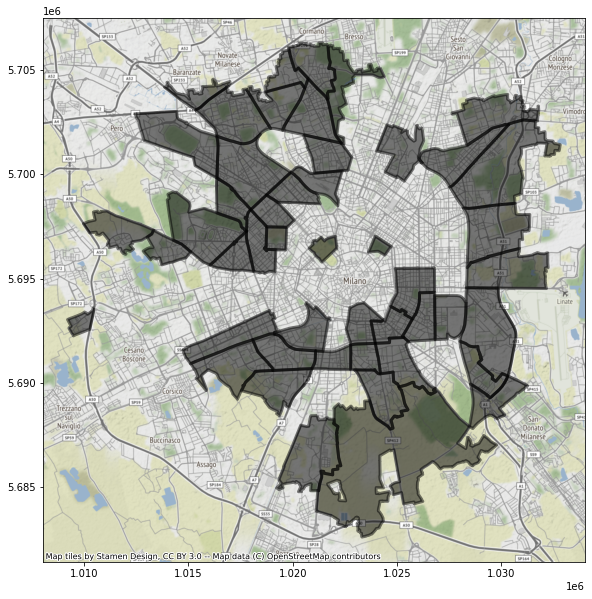

In [25]:
ax = quaMin.to_crs(epsg =3857).plot(figsize = (10, 10), edgecolor = "k", facecolor = "k", alpha = 0.5, linewidth = 3)
contextily.add_basemap(ax)

- una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

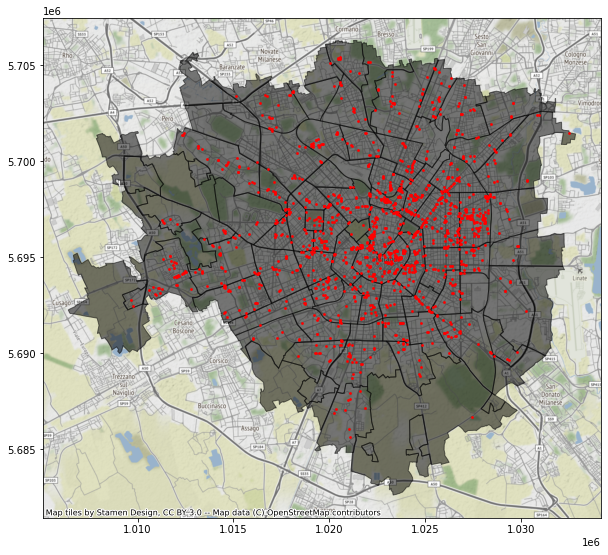

In [26]:
ax = quartieri.to_crs(epsg =3857).plot(figsize = (10, 10), edgecolor = "k", facecolor = "k", alpha = 0.5)
areaListQua.to_crs(epsg =3857).plot(color = "red", ax = ax, markersize = 3)
contextily.add_basemap(ax)

- una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

In [27]:
areaQUaFin = areaListQua.groupby('NIL').count().reset_index()
areaQUaFin

NIL  id_amat  id_via  num_civico  \
0                                    ADRIANO        5       5           3   
1                                     AFFORI       11      11          11   
2   BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA       31      31          30   
3                                 BANDE NERE       21      21          13   
4                                     BARONA       14      14          12   
..                                       ...      ...     ...         ...   
71                         TRIULZO SUPERIORE        1       1           1   
72              UMBRIA - MOLISE - CALVAIRATE       16      16          11   
73                   VIGENTINO - Q.RE FATIMA       12      12          10   
74       VILLAPIZZONE - CAGNOLA - BOLDINASCO       14      14          12   
75                                XXII MARZO       19      19          14   

    municipio  stato  categoriev  numero_man  stalli_per  stalli_tot  ...  \
0           5      5           5           5           5           5  ...   
1          11     11          11          11          11          11  ...   
2          31     31          31          31          31          31  ...   
3          21     21          21          21          21          21  ...   
4          14     14          14          14          14          14  ...   
..        ...    ...         ...         ...         ...         ...  ...   
71          1      1           1           1           1           1  ...   
72         16     16          16          16          16          16  ...   
73         12     12          12          12          12          12  ...   
74         14     14          14          14          14          14  ...   
75         19     19          19          19          19          19  ...   

    SEZIONE  MUNICIPIO  index_right  ID_NIL  Valido_dal  Valido_al  Fonte  \
0         5          5            5       5           5          5      5   
1        11         11           11      11          11         11     11   
2        30         30           31      31          31         31     31   
3        21         21           21      21          21         21     21   
4        12         12           14      14          14         14     14   
..      ...        ...          ...     ...         ...        ...    ...   
71        1          1            1       1           1          1      1   
72       16         16           16      16          16         16     16   
73       12         12           12      12          12         12     12   
74       14         14           14      14          14         14     14   
75       19         19           19      19          19         19     19   

    Shape_Leng  Shape_Area  OBJECTID  
0            5           5         5  
1           11          11        11  
2           31          31        31  
3           21          21        21  
4           14          14        14  
..         ...         ...       ...  
71           1           1         1  
72          16          16        16  
73          12          12        12  
74          14          14        14  
75          19          19        19  

[76 rows x 29 columns]

In [28]:
areaQUaFin2 = pd.merge(areaQUaFin, quartieri,  how = "left", on = ['NIL'])
areaQUaFin2

NIL  id_amat  id_via  num_civico  \
0                                    ADRIANO        5       5           3   
1                                     AFFORI       11      11          11   
2   BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA       31      31          30   
3                                 BANDE NERE       21      21          13   
4                                     BARONA       14      14          12   
..                                       ...      ...     ...         ...   
71                         TRIULZO SUPERIORE        1       1           1   
72              UMBRIA - MOLISE - CALVAIRATE       16      16          11   
73                   VIGENTINO - Q.RE FATIMA       12      12          10   
74       VILLAPIZZONE - CAGNOLA - BOLDINASCO       14      14          12   
75                                XXII MARZO       19      19          14   

    municipio  stato  categoriev  numero_man  stalli_per  stalli_tot  ...  \
0           5      5           5           5           5           5  ...   
1          11     11          11          11          11          11  ...   
2          31     31          31          31          31          31  ...   
3          21     21          21          21          21          21  ...   
4          14     14          14          14          14          14  ...   
..        ...    ...         ...         ...         ...         ...  ...   
71          1      1           1           1           1           1  ...   
72         16     16          16          16          16          16  ...   
73         12     12          12          12          12          12  ...   
74         14     14          14          14          14          14  ...   
75         19     19          19          19          19          19  ...   

    Shape_Area_x  OBJECTID_x  ID_NIL_y  Valido_dal_y  Valido_al_y  \
0              5           5        17    05/02/2020      Vigente   
1             11          11        80    05/02/2020      Vigente   
2             31          31        55    05/02/2020      Vigente   
3             21          21        52    05/02/2020      Vigente   
4             14          14        46    05/02/2020      Vigente   
..           ...         ...       ...           ...          ...   
71             1           1        32    05/02/2020      Vigente   
72            16          16        28    05/02/2020      Vigente   
73            12          12        38    05/02/2020      Vigente   
74            14          14        71    05/02/2020      Vigente   
75            19          19        26    05/02/2020      Vigente   

                        Fonte_y  Shape_Leng_y  Shape_Area_y  OBJECTID_y  \
0   Milano 2030 - PGT Approvato   9276.875747  2.433358e+06         175   
1   Milano 2030 - PGT Approvato   6470.396969  2.070816e+06         158   
2   Milano 2030 - PGT Approvato  11963.033873  3.471750e+06         154   
3   Milano 2030 - PGT Approvato   6776.458948  2.663780e+06         146   
4   Milano 2030 - PGT Approvato   6836.011433  2.006249e+06         115   
..                          ...           ...           ...         ...   
71  Milano 2030 - PGT Approvato   6923.734083  1.389578e+06         120   
72  Milano 2030 - PGT Approvato   4912.251168  1.192352e+06         133   
73  Milano 2030 - PGT Approvato   6479.236348  1.853163e+06         127   
74  Milano 2030 - PGT Approvato   8375.003494  3.426941e+06         116   
75  Milano 2030 - PGT Approvato   5943.695768  1.637438e+06         151   

                                           geometry_y  
0   POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...  
1   POLYGON ((9.17767 45.51899, 9.17796 45.51848, ...  
2   POLYGON ((9.09315 45.46938, 9.09393 45.46802, ...  
3   POLYGON ((9.12727 45.46894, 9.12874 45.46840, ...  
4   POLYGON ((9.16112 45.42589, 9.16056 45.42605, ...  
..                                                ...  
71  POLYGON ((9.26378 45.43251, 9.26384 45.43248, ...  
72  POLYGON (

In [29]:
areaQUaFin2.rename(columns = {'geometry_y':'geometry'}, inplace = True)

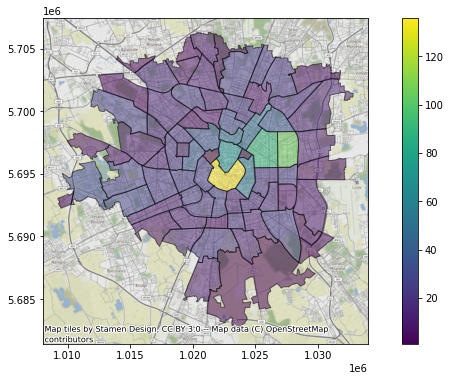

In [30]:
ax = areaQUaFin2.to_crs(epsg = 3857).plot(figsize = (12 , 6), column = "id_via", legend=True, alpha = 0.5, edgecolor = "k")
contextily.add_basemap(ax)

- data una via (inserita dall'utente), avere le aree di sosta di quella via

In [31]:
via = input("Inserisci una via: ")

if via in list(areeLista.DESCRIZIONE_VIA):
  print(areeLista[areeLista["DESCRIZIONE_VIA"] == via][["stalli_tot"]])
else:
  print("La via da te inserita non è presente all'interno del geodataframe")

Inserisci una via: AFFORI
   stalli_tot
1          10


- dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta

Inserisci il nome di un quartiere: PORTELLO


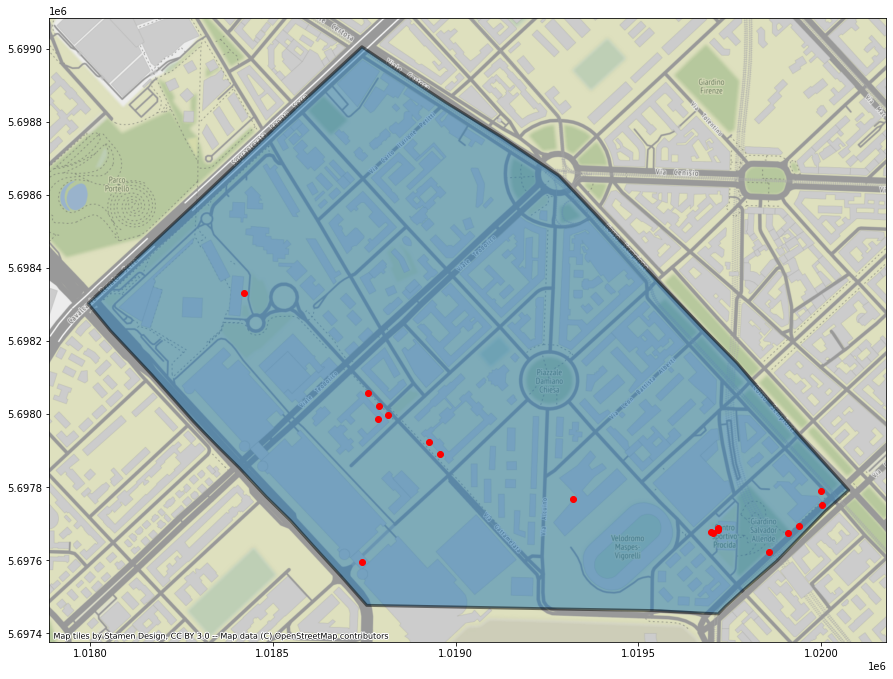

In [32]:
quartiere_input = input("Inserisci il nome di un quartiere: ")

if quartiere_input in list(quartieri.NIL):

  quartiere= quartieri[quartieri["NIL"] == quartiere_input]

  bike_area_quartiere = biciSosta[biciSosta.intersects(quartiere.unary_union)]
  bike_area_quartiere

  ax = quartiere.to_crs(epsg=3857).plot(figsize=(15,15), alpha= 0.5, edgecolor= "k", linewidth= 3)
  bike_area_quartiere.to_crs(epsg=3857).plot(ax=ax, color= "r")
  contextily.add_basemap(ax)
else:
  print("Il quartiere da te inserito non è presente all'inetrnmo del geodataframe")

- date le coordinate geografiche di un punto (inserite dall'utente), avere una mappa che visualizzi le aree di sosta a meno di 500 m da quel punto;

Inserisci la longitudine: 9.191383
Inserisci la latitudine: 45.464211


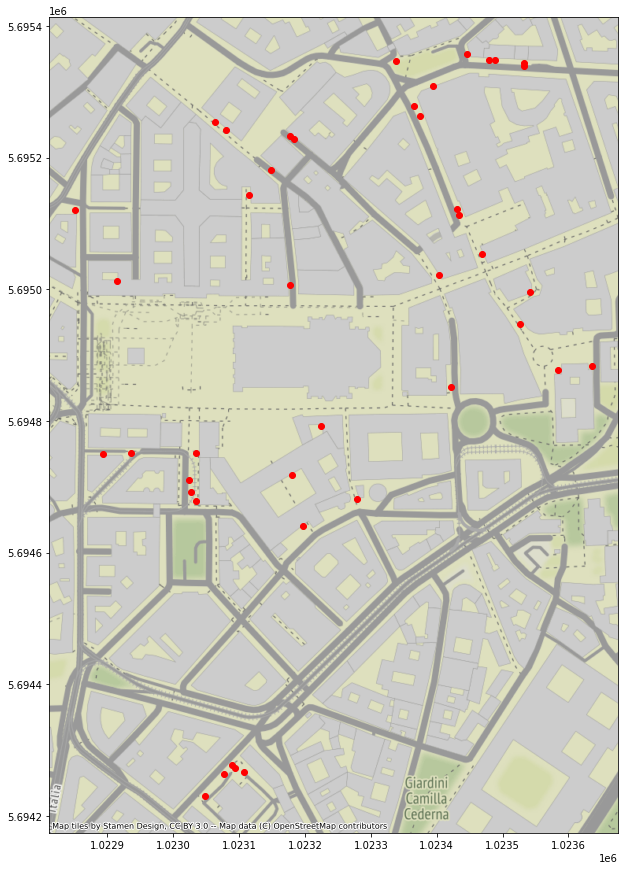

In [35]:
from shapely.geometry import Point

longitudine = float(input("Inserisci la longitudine: "))
latitudine = float(input("Inserisci la latitudine: "))
#9.191383, 45.464211 (coordinate del duomo)

punto = Point(longitudine, latitudine)
punto

buffer_punto = punto.buffer(0.0044) # 500 gradi in metri sono 0.0044 metri
aree_sosta_meno500 =  biciSosta[biciSosta.within(buffer_punto)]

ax = aree_sosta_meno500.to_crs(epsg=3857).plot(figsize=(15,15), color= "r")
contextily.add_basemap(ax)